In [6]:
!/root/openface/demos/compare.py /mnt/data/wangli/test_img/Q1.jpg /mnt/data/wangli/test_img/Qa.png

Comparing /mnt/data/wangli/test_img/Q1.jpg with /mnt/data/wangli/test_img/Qa.png.
  + Squared l2 distance between representations: 0.184


In [10]:
!/root/openface/demos/compare.py /mnt/data/wangli/test_img/Qa.png /mnt/data/wangli/test_img/Y2.jpg

Comparing /mnt/data/wangli/test_img/Qa.png with /mnt/data/wangli/test_img/Y2.jpg.
  + Squared l2 distance between representations: 0.499


In [8]:
!/root/openface/demos/compare.py /mnt/data/wangli/test_img/Q1.jpg /mnt/data/wangli/test_img/F4.jpg

Comparing /mnt/data/wangli/test_img/Q1.jpg with /mnt/data/wangli/test_img/F4.jpg.
  + Squared l2 distance between representations: 0.168


In [3]:
!/root/openface/demos/compare.py /mnt/data/mydataset/test_img/Q1.jpg /mnt/data/mydataset/test_img/Q2.jpg 

Comparing /mnt/data/mydataset/test_img/tock15.jpg with /mnt/data/mydataset/test_img/tock16.jpg.
  + Squared l2 distance between representations: 0.057


# 一比一的识别上 任然有很高的误识率 ， F4和Q1 Q4 Qa 就比较相似的结果 

In [12]:
!/root/openface/demos/compare.py /mnt/data/wangli/test_img/*

Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/C3.jpg.
  + Squared l2 distance between representations: 0.545
Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/F4.jpg.
  + Squared l2 distance between representations: 0.521
Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/H4.jpg.
  + Squared l2 distance between representations: 0.419
Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/Q1.jpg.
  + Squared l2 distance between representations: 0.358
Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/Q2.jpg.
  + Squared l2 distance between representations: 0.324
Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/Q3.jpg.
  + Squared l2 distance between representations: 0.608
Comparing /mnt/data/wangli/test_img/A2.jpg with /mnt/data/wangli/test_img/Q4.jpg.
  + Squared l2 distance between representations: 0.389
Comparing /mnt/data/wangli/test_img/A2.jp

Comparing /mnt/data/wangli/test_img/Q5.jpg with /mnt/data/wangli/test_img/Q6.jpg.
  + Squared l2 distance between representations: 0.623
Comparing /mnt/data/wangli/test_img/Q5.jpg with /mnt/data/wangli/test_img/Qa.png.
  + Squared l2 distance between representations: 0.634
Comparing /mnt/data/wangli/test_img/Q5.jpg with /mnt/data/wangli/test_img/Y2.jpg.
  + Squared l2 distance between representations: 0.680
Comparing /mnt/data/wangli/test_img/Q6.jpg with /mnt/data/wangli/test_img/Qa.png.
  + Squared l2 distance between representations: 0.481
Comparing /mnt/data/wangli/test_img/Q6.jpg with /mnt/data/wangli/test_img/Y2.jpg.
  + Squared l2 distance between representations: 0.571
Comparing /mnt/data/wangli/test_img/Qa.png with /mnt/data/wangli/test_img/Y2.jpg.
  + Squared l2 distance between representations: 0.499


In [24]:
import numpy as np 
 
import matplotlib.pyplot as plt 

%matplotlib inline 
import os
import matplotlib.image as mpimg # mpimg 用于读取图片

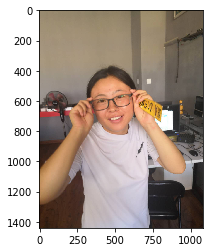

In [27]:
#y显示原图
image1=os.path.normpath("/mnt/data/mydataset/test_img/H3.jpg")
im = mpimg.imread(image1)  ##文件存在的路径
plt.imshow(im)  

# dlib 特征提取

In [39]:
import openface


modelDir = os.path.join('/root/openface', 'models')
dlibModelDir = os.path.join(modelDir, 'dlib')
openfaceModelDir = os.path.join(modelDir, 'openface')

dlibFacePredictor=os.path.join(dlibModelDir, "shape_predictor_68_face_landmarks.dat")
align = openface.AlignDlib(dlibFacePredictor)

networkModel=os.path.join(openfaceModelDir, 'nn4.small2.v1.t7')

imgDim=96
net = openface.TorchNeuralNet(networkModel, imgDim, cuda=False)

# 参数说明
### bb=getLargestFaceBoundingBox 获取 人脸位置 dlib对象
可以使用dlib 的类方法 获取上下左右坐标 长宽面积等等

###  alignedFace   rgb图片，numarray type

### rep1 特征向量  Vector of features extracted with the neural network.
这里 神经网络 所关注的特征位置在哪里？ 这是需要关心的，一次确定模型的可靠性

[[[177 113  91]
  [184 120  95]
  [188 123  94]
  ...
  [193 124  86]
  [169 108  68]
  [154 100  61]]

 [[225 154 129]
  [226 155 130]
  [217 145 117]
  ...
  [186 114  74]
  [180 118  81]
  [201 147 111]]

 [[234 157 130]
  [231 153 126]
  [233 153 126]
  ...
  [194 115  76]
  [185 108  70]
  [223 147 111]]

 ...

 [[199 179 178]
  [202 182 184]
  [207 187 189]
  ...
  [203 184 186]
  [196 173 183]
  [193 170 178]]

 [[196 176 175]
  [201 181 183]
  [206 186 188]
  ...
  [205 186 189]
  [199 176 186]
  [196 173 182]]

 [[195 175 175]
  [200 180 182]
  [206 186 188]
  ...
  [207 190 196]
  [202 183 187]
  [197 178 182]]]
[-0.04823682  0.18742916  0.10349771  0.01622758 -0.07920825  0.18418182
 -0.04755501  0.11765502 -0.03806997 -0.00565012  0.01777929 -0.01703
 -0.00539334 -0.19718678 -0.02624744 -0.01370947 -0.14151733  0.0444403
 -0.03443312 -0.10042656  0.17812212 -0.04376784  0.04098167 -0.05810674
  0.07003534 -0.14154942 -0.05308048 -0.1047777  -0.03116136  0.02980629
  0.05420

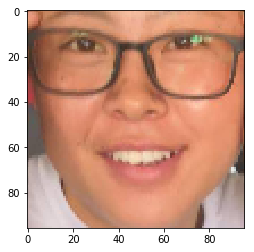

In [63]:
bb = align.getLargestFaceBoundingBox(im)
alignedFace = align.align(imgDim, im, bb,
                          landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
rep1 = net.forward(alignedFace)

plt.imshow(alignedFace)
# `rep2` obtained similarly.
print(alignedFace)
print(rep1)
print(bb)

# 准确率的影响因素
* 图片质量

|pixels | val- rate |
|-|-|
|1600|37.8%|
|6400|79.5%|
|14400|84.5%|
|25600|85.7%|
|65536|56.4%|

这就表示了  在实际街景中 需要的摄像头分辨率 和安装距离  是有固定范围的
___


# 可视化

In [ ]:
##  框出人脸位置


{'faceRectWidth': 269, 'faceRectHeight': 268, 'faceRectPoint': (349, 528)}
<class 'dlib.rectangle'>


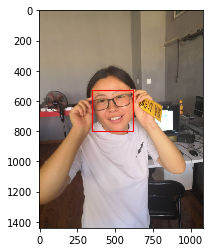

In [60]:

import matplotlib.patches as patches
plt.figure(8)
plt.imshow(im)
currentAxis=plt.gca()

faceRect={"faceRectWidth":bb.width(),"faceRectHeight":bb.height(),"faceRectPoint":(bb.left(),bb.top())}
rect=patches.Rectangle(faceRect["faceRectPoint"],faceRect["faceRectWidth"],faceRect["faceRectHeight"],linewidth=1,edgecolor='r',facecolor='none')
currentAxis.add_patch(rect)




print(faceRect)
print(type(bb))


# 特征降维 与可视化

In [89]:
! /root/openface/util/tsne.py  /mnt/ --names 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 



Note: This example assumes that `name i` corresponds to `label i`
in `labels.csv`.


Traceback (most recent call last):
  File "/root/openface/util/tsne.py", line 47, in <module>
    plt.savefig(out)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py", line 577, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py", line 1476, in savefig
    self.canvas.print_figure(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/backend_bases.py", line 2211, in print_figure
    **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/backends/backend_pdf.py", line 2477, in print_pdf
    file = PdfFile(filename)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/backends/backend_pdf.py", line 418, in __init__
    fh = open(filename, 'wb')
IOError: [Errno 16] Device or resource busy: '/mnt//tsne.pdf'


* 从训练的128d 向量看 样本少的个人 与其他个人重合的机会很大
<img src = "./doc/tsne.png"/>